In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

In [96]:
start='2009-12-31'
end='2019-12-31'
data = yf.download('AAPL', start, end)
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.405578,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200


In [97]:
data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451057,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517090,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896332,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290054,144114400


In [98]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.405578,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200


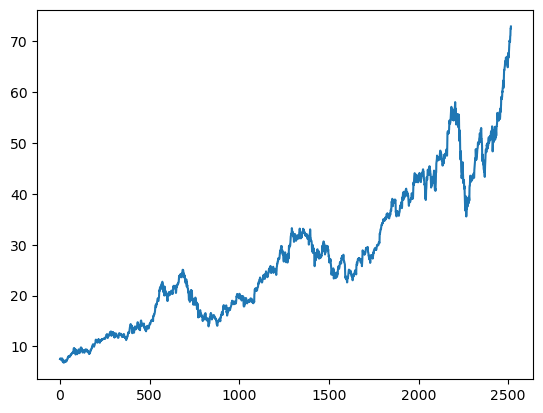

In [99]:
plt.plot(data.Close)

In [100]:
ma100=data.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.201075
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
Name: Close, Length: 2516, dtype: float64

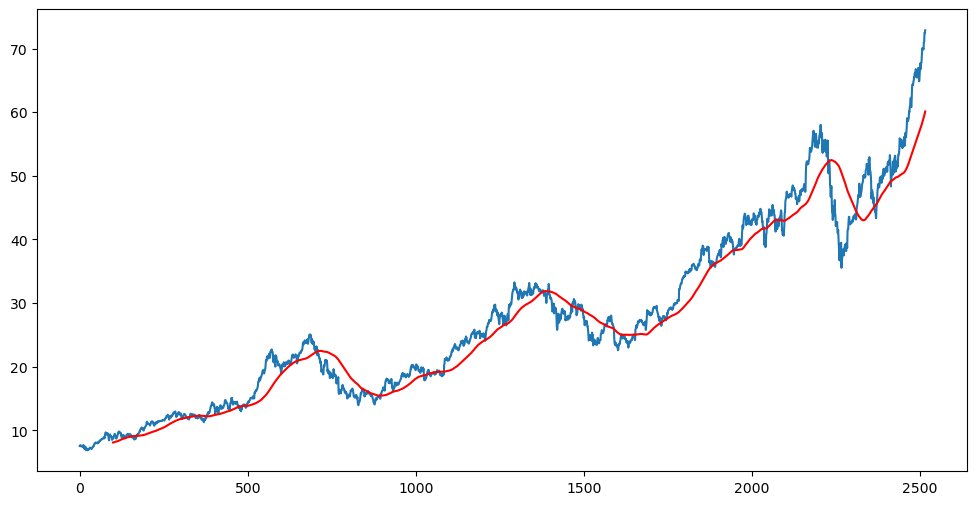

In [101]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [102]:
ma200=data.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.132313
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
Name: Close, Length: 2516, dtype: float64

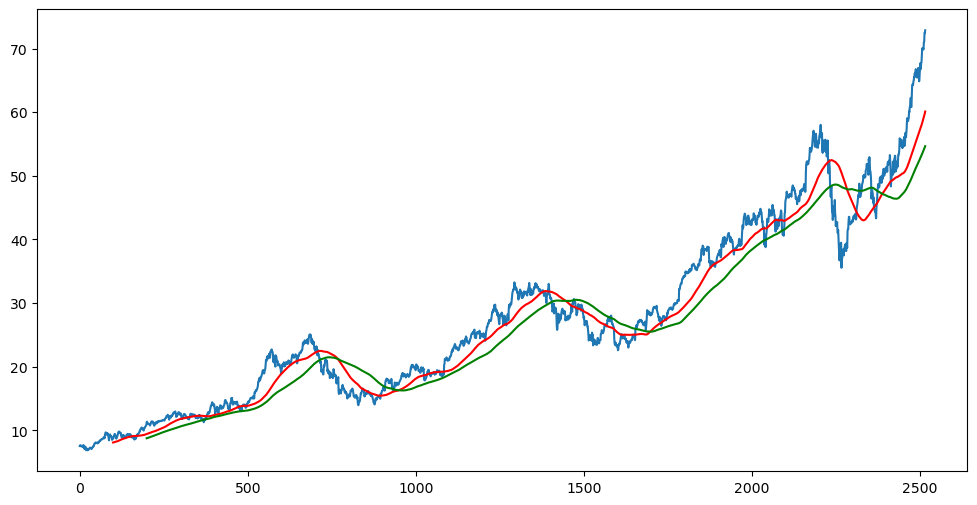

In [103]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [104]:
data.shape

(2516, 7)

In [105]:
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [106]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [107]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [109]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [110]:
data_training_array.shape

(1761, 1)

In [111]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train), np.array(y_train)

In [112]:
# ML Model

In [113]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [114]:
model = Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,
               input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [115]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 15s 153ms/step - loss: 0.0644
Epoch 2/50
52/52 [==============================] - 8s 158ms/step - loss: 0.0136
Epoch 3/50
52/52 [==============================] - 8s 155ms/step - loss: 0.0114
Epoch 4/50
52/52 [==============================] - 8s 155ms/step - loss: 0.0104
Epoch 5/50
52/52 [==============================] - 8s 154ms/step - loss: 0.0093
Epoch 6/50
52/52 [==============================] - 8s 154ms/step - loss: 0.0105
Epoch 7/50
52/52 [==============================] - 8s 162ms/step - loss: 0.0101
Epoch 8/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0089
Epoch 9/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0084
Epoch 10/50
52/52 [==============================] - 8s 149ms/step - loss: 0.0074
Epoch 11/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 8s 149ms/step - loss: 0.0077
Epoch 13/50
52/52 [=====

In [117]:
model.save('keras_model.h5')

In [118]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [119]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [120]:
past_100_days=data_training.tail(100)

In [121]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\astro\AppData\Local\Temp\ipykernel_2592\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [122]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [123]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [124]:
input_data.shape

(855, 1)

In [125]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [126]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [127]:
#Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 48ms/step


In [128]:
y_predicted.shape

(755, 1)

In [129]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [130]:
y_predicted

array([[0.12835379],
       [0.12892953],
       [0.12951279],
       [0.13009134],
       [0.13065436],
       [0.1311934 ],
       [0.13170509],
       [0.13219152],
       [0.13265783],
       [0.13311139],
       [0.13355842],
       [0.13400179],
       [0.13444534],
       [0.13489309],
       [0.1353464 ],
       [0.13580498],
       [0.13626784],
       [0.13673237],
       [0.13720374],
       [0.13769192],
       [0.13820449],
       [0.1387443 ],
       [0.13930818],
       [0.13993824],
       [0.14069715],
       [0.14163831],
       [0.14280899],
       [0.14425045],
       [0.14599061],
       [0.14803904],
       [0.15038252],
       [0.15292941],
       [0.15566778],
       [0.15859696],
       [0.16170251],
       [0.1649596 ],
       [0.1683409 ],
       [0.1718176 ],
       [0.17534083],
       [0.1788633 ],
       [0.18235159],
       [0.1857727 ],
       [0.18911175],
       [0.19235933],
       [0.19551177],
       [0.1985649 ],
       [0.20151378],
       [0.204

In [131]:
scaler.scale_

array([0.02123255])

In [132]:
scale_factor= 1/0.02123255
y_predicted= y_predicted*scale_factor
y_test=y_test*scale_factor

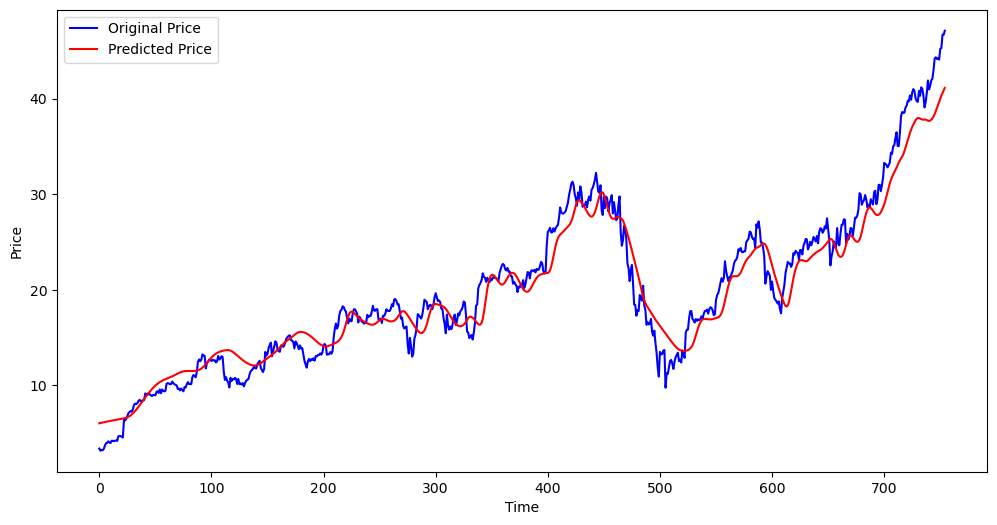

In [133]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()